* Age - Numerical
* Attrition - Categorical (Yes / No)
* BusinessTravel - Categorical ('Travel_Rarely', 'Travel_Frequently', 'Non-Travel')
* DailyRate - Numerical
* Department - Categorical ('Sales', 'Research & Development', 'Human Resources')
* DistanceFromHome - Numerical
* Education - Categorical (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')
* EducationField - Categorical ('Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources')
* EmployeeCount - Categorical (0, 1)
* EmployeeNumber - Numerical (Identifier)
* EnvironmentSatisfaction - Categorical (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
* Gender - Categorical (Female, Male)
* HourlyRate - Numerical
* JobInvolvement - Categorical (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
* JobLevel - Categorical (2, 1, 3, 4, 5)
* JobRole - Categorical ('Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources')
* JobSatisfaction - Categorical (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
* MaritalStatus - Categorical ('Single', 'Married', 'Divorced')
* MonthlyIncome - Numerical
* MonthlyRate - Numerical
* NumCompaniesWorked - Numerical
* Over18 - Categorical (Y)
* OverTime - Categorical (Yes, No)
* PercentSalaryHike - Categorical (11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25)
* PerformanceRating - Categorical (1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding')
* RelationshipSatisfaction - Categorical (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
* StandardHours - Categorical (80)
* StockOptionLevel - Categorical (0, 1, 3, 2)
* TotalWorkingYears - Numerical
* TrainingTimesLastYear - Numerical
* WorkLifeBalance - Categorical (1 'Bad' 2 'Good' 3 'Better' 4 'Best')
* YearsAtCompany - Numerical
* YearsInCurrentRole - Numerical
* YearsSinceLastPromotion - Numerical
* YearsWithCurrManager - Numerical

In [2]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [48]:
#with open('DataIBM/WA_Fn-UseC_-HR-Employee-Attrition_csv.csv') as csvfile:
#    IBMAttritionRaw = csv.reader(csvfile, delimiter=',')

IBMAttritionRaw = pd.read_csv("DataIBM/WA_Fn-UseC_-HR-Employee-Attrition_csv.csv")
IBMAttritionRaw.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


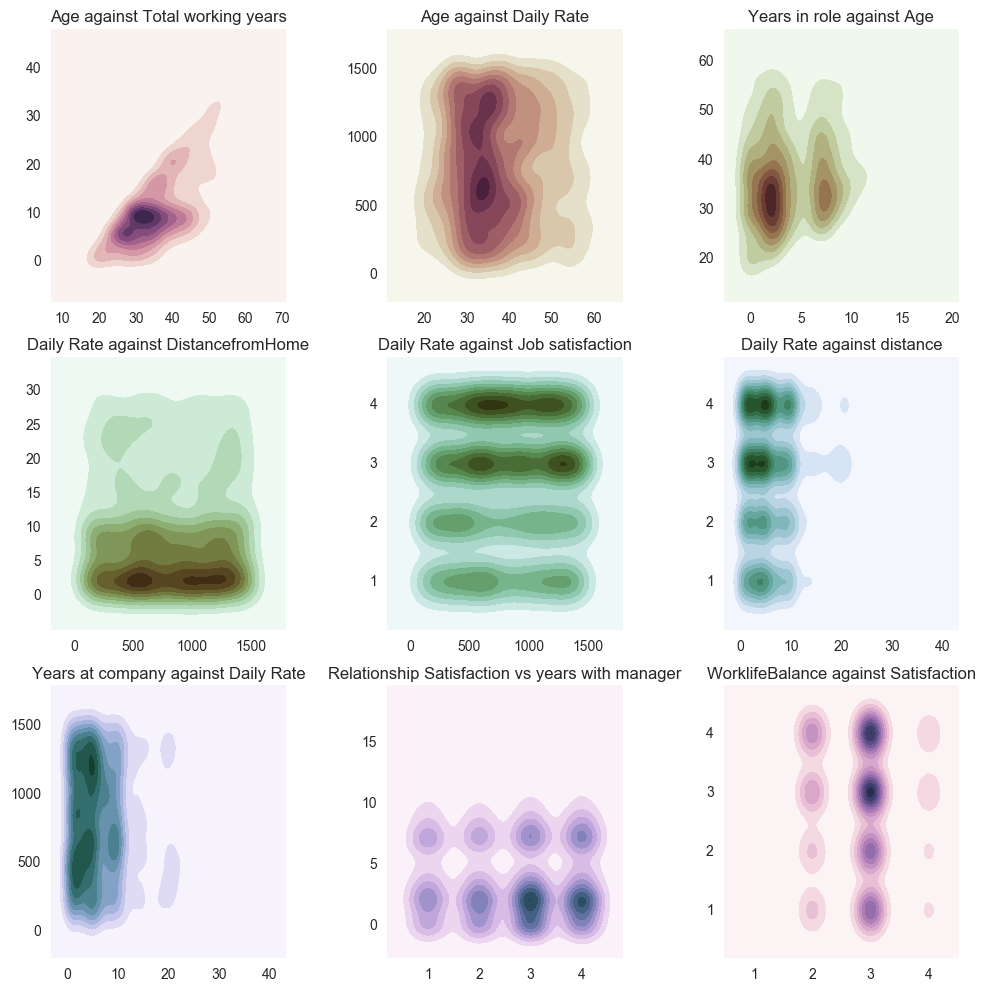

In [33]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = IBMAttritionRaw['Age'].values
y = IBMAttritionRaw['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = IBMAttritionRaw['Age'].values
y = IBMAttritionRaw['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = IBMAttritionRaw['YearsInCurrentRole'].values
y = IBMAttritionRaw['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = IBMAttritionRaw['DailyRate'].values
y = IBMAttritionRaw['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = IBMAttritionRaw['DailyRate'].values
y = IBMAttritionRaw['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = IBMAttritionRaw['YearsAtCompany'].values
y = IBMAttritionRaw['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = IBMAttritionRaw['YearsAtCompany'].values
y = IBMAttritionRaw['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = IBMAttritionRaw['RelationshipSatisfaction'].values
y = IBMAttritionRaw['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = IBMAttritionRaw['WorkLifeBalance'].values
y = IBMAttritionRaw['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

In [7]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
       u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= IBMAttritionMod[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=IBMAttritionMod[numerical].columns.values,
        y=IBMAttritionMod[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [31]:
#Change Attrition to Binary 1//0
target_map = {'Yes':1, 'No':0}
IBMAttritionMod = IBMAttritionRaw
IBMAttritionMod["Attrition_numerical"] = IBMAttritionMod["Attrition"].apply(lambda x: target_map[x])

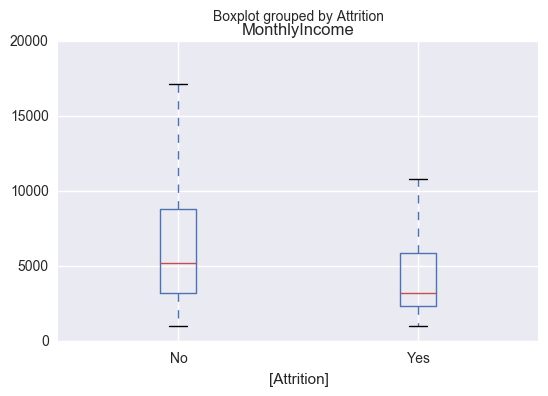

In [26]:
IBMAttritionMod[['MonthlyIncome','Attrition']].boxplot(by="Attrition")

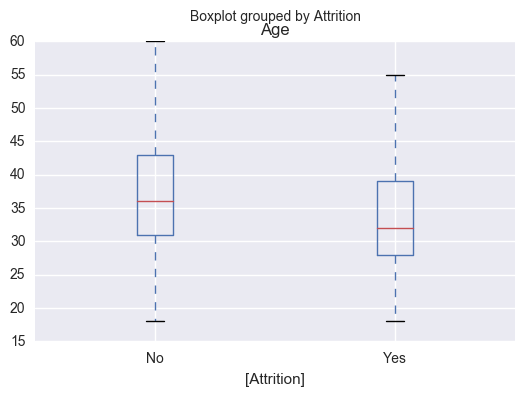

In [43]:
IBMAttritionMod[['Age','Attrition']].boxplot(by="Attrition")

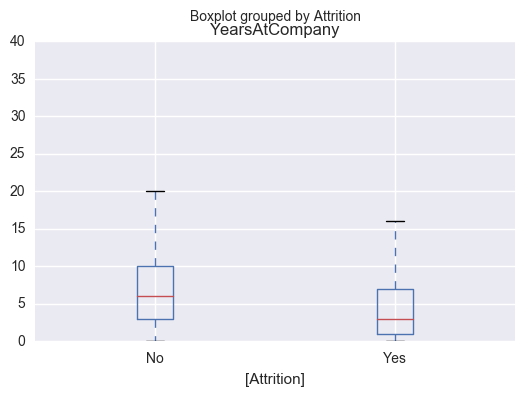

In [44]:
IBMAttritionMod[['YearsAtCompany','Attrition']].boxplot(by="Attrition")

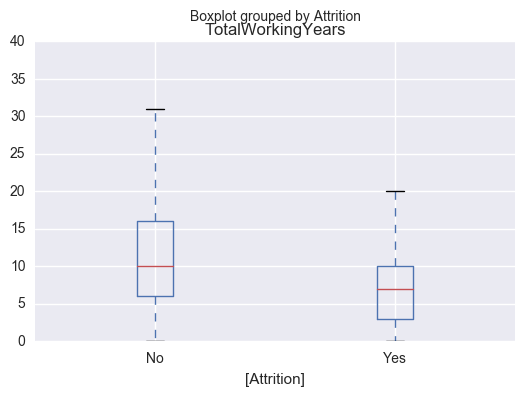

In [45]:
IBMAttritionMod[['TotalWorkingYears','Attrition']].boxplot(by="Attrition")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B1B1630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DBCFF60>], dtype=object)

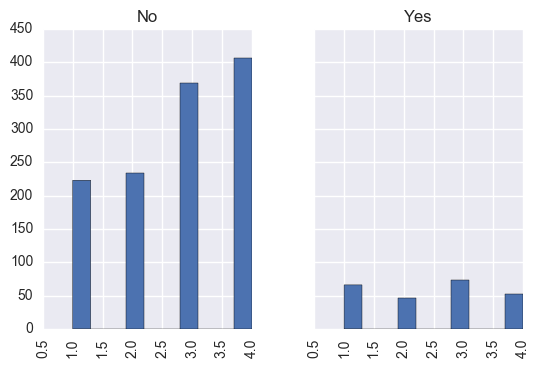

In [39]:
IBMAttritionMod[['JobSatisfaction','Attrition']].hist(by="Attrition", column="JobSatisfaction", sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B65F9B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B302160>], dtype=object)

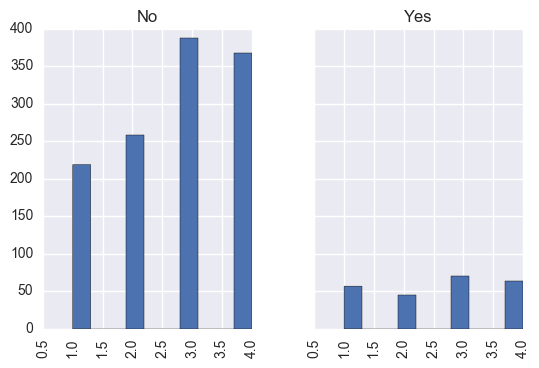

In [38]:
IBMAttritionMod[['RelationshipSatisfaction','Attrition']].hist(by="Attrition", column="RelationshipSatisfaction", sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B34CD30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B4AE0F0>], dtype=object)

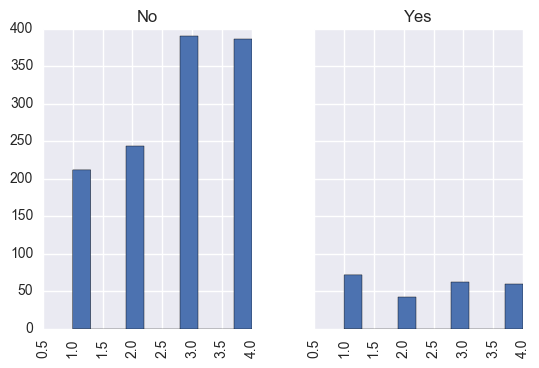

In [41]:
IBMAttritionMod[['EnvironmentSatisfaction','Attrition']].hist(by="Attrition", column="EnvironmentSatisfaction", sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E440240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DE58668>], dtype=object)

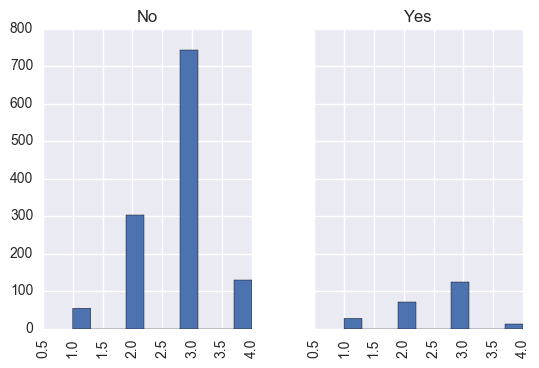

In [42]:
IBMAttritionMod[['JobInvolvement','Attrition']].hist(by="Attrition", column="JobInvolvement", sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1D4320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E345240>], dtype=object)

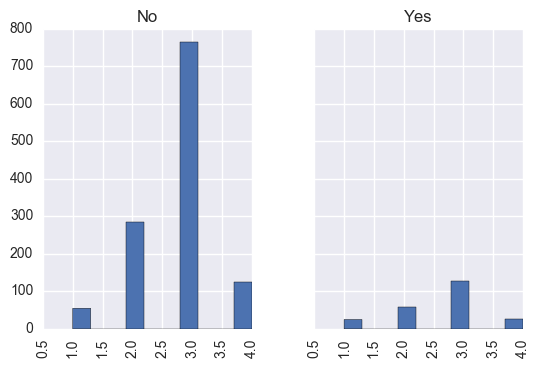

In [49]:
IBMAttritionMod[['WorkLifeBalance','Attrition']].hist(by="Attrition", column="WorkLifeBalance", sharey=True)